# Keras - high level deep learning library

Defining an architecture of deep neural network is complex using directly a low - level linear algebra operations. Keras provides implementations of common neural network layers, as well as algorithms to optimize the neural networks. 

### Image classification task

In example below a neural network is trained to detect what is shown in the image.

(28, 28)


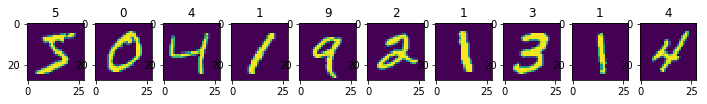

In [41]:
import pickle as pc
import numpy as np

from sklearn.model_selection import train_test_split

from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.merge import Concatenate
from keras.optimizers import Adam
from keras.datasets import cifar10, mnist

X, y = mnist.load_data()[0]
#X, y = cifar10.load_data()[0]

x_shape = X.shape[1:]
print(x_shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.title(y[i])
    plt.imshow(X[i])
plt.show()

In [42]:
# reshape images to vector
X = np.reshape(X, (len(X), -1))

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

# define network architecture
nettype = 'dnn'

if nettype == 'dnn':
    x = Input(shape=X_train[0].shape)
    h = x
    h = Dense(64)(h)
    h = LeakyReLU()(h)
    #h = Concatenate()([h, x])
    h = Dense(10, activation='softmax')(h)
    y = h
else:
    X_train = np.reshape(X_train, (len(X_train), ) + x_shape)
    X_test = np.reshape(X_test, (len(X_test), ) + x_shape)
    
    x = Input(shape=X_train[0].shape)
    h = x
    
    h = Conv2D(64, (3,3))(h)
    h = MaxPool2D()(h)
    h = LeakyReLU()(h)
    
    h = Flatten()(h)
    
    h = Dense(10, activation='softmax')(h)
    y = h
    

model = Model(inputs=x, outputs=y)

# compile computational graph of NN
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

/home/user/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


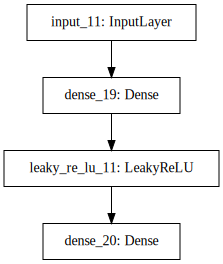

In [43]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [44]:
# train NN
model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=10,
                    verbose=1,)

# evaluate your NN
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
45000/45000 [==============================] - 0s - loss: 8.5210 - acc: 0.4644     
Epoch 2/10
45000/45000 [==============================] - 0s - loss: 7.6060 - acc: 0.5248     
Epoch 3/10
45000/45000 [==============================] - 0s - loss: 7.4336 - acc: 0.5362     
Epoch 4/10
45000/45000 [==============================] - 0s - loss: 7.3179 - acc: 0.5434     
Epoch 5/10
45000/45000 [==============================] - 0s - loss: 7.2900 - acc: 0.5456     
Epoch 6/10
45000/45000 [==============================] - 0s - loss: 7.2550 - acc: 0.5480     
Epoch 7/10
45000/45000 [==============================] - 0s - loss: 7.2362 - acc: 0.5494     
Epoch 8/10
45000/45000 [==============================] - 0s - loss: 7.2469 - acc: 0.5486     
Epoch 9/10
45000/45000 [==============================] - 0s - loss: 7.2348 - acc: 0.5496     
Epoch 10/10
45000/45000 [==============================] - 0s - loss: 7.2147 - acc: 0.5508     
Test loss: 7.07032510198
Test accuracy: 0.5595999